In [208]:
#imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.firefox.options import Options
import time
import os
from fake_useragent import UserAgent
from random import randint
import pandas as pd
import numpy as np
import re
from datetime import datetime
from datetime import timedelta
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import requests
from sqlalchemy.exc import IntegrityError
import string
from playwright.sync_api import sync_playwright

# Firefox

In [159]:
options = Options()
ua = UserAgent()
userAgent = ua.random
print(userAgent)
options.add_argument(f'user-agent={userAgent}')
#options.add_argument("--headless")
driver = webdriver.Firefox(firefox_options=options)
#     driver = webdriver.Firefox()

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36


<ipython-input-159-5315509cced7>:7: DeprecationWarning: use options instead of firefox_options
  driver = webdriver.Firefox(firefox_options=options)


In [24]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36', 
    'Accept-Encoding': 'gzip, deflate', 
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,/;q=0.8', 
    'Connection': 'keep-alive', 
    'Accept-Language': 'en-US,en;q=0.5', 
    'Upgrade-Insecure-Requests': '1', 
    'Pragma': 'no-cache', 
    'Cache-Control': 'no-cache'
    }
    
toto  = 'https://www.safa.com.sa/products?category%5B0%5D=86&page=3'
r = requests.get(toto, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')


In [223]:
import asyncio
from playwright.async_api import async_playwright
async def main():    
    async with async_playwright() as p:
        print('toto')
        browser = await p.chromium.launch(headless=False)
    # browser = p.chromium.launch()
#     context = browser.new_context()
        page = await browser.new_page()        
#         await page.goto("http://playwright.dev")          
        await page.goto('https://www.facebook.com/')
    # Interact with login form
        page.click('#email')
        page.fill('#email', 'mameri.wafi@gmail.com')
        page.fill('#pass', 'wafi2013*')
        page.click('//*[@name="login"]')
        page.wait_for_timeout(4000)
        print(page.title())    
        await browser.close()
        


In [224]:
asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [226]:
import asyncio
from playwright.async_api import async_playwright
async def main():    
    async with async_playwright() as p:        
        browser = await p.chromium.launch()        
        page = await browser.new_page()        
        await page.goto("http://playwright.dev")        
        print(await page.title())        
        await browser.close()
asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [213]:
browser = sync_playwright().chromium.launch(headless=False)
# browser = p.chromium.launch()
#     context = browser.new_context()
page = browser.new_page()  
page.goto('https://www.facebook.com/')
# Interact with login form


AttributeError: 'PlaywrightContextManager' object has no attribute 'chromium'

In [64]:
cats = soup.find('div', {'id': 'wayfinding-breadcrumbs_feature_div'}).find_all('span', {'class': 'a-list-item'})
cat1 = cats[0].text.strip()
cat2 = cats[2].text.strip()
cat3 = cats[4].text.strip()

5


# Scrape urls

In [165]:
def get_data(url):
    """
    Fonction to scrape all urls from itch categories
    Return Data
    """
#     s = HTMLSession()
#     r = s.get(url)
#     r.html.render(timeout= 30, sleep=1)
    print('Url:', url)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    cookies = {'session': '134-8225175-0355220'}
    r = requests.get(url, headers=headers, cookies=cookies)
    soup = BeautifulSoup(r.content, "html.parser")
    time.sleep(1)
    products = soup.find_all('h3', {'class': 'product-title'})
    
    liens = [toto.find('a')['href']  for toto in products]
    print('Len products', len(liens))
    list_liens = []
    
    for t in liens:
        list_liens.append(t)
#     print('list_cat1', list_cat1)
    data = {
        'url':list_liens,
        }
    return soup, list_liens


def getnextpage(soup):
    """
    Check if next url exist else send None objects
    Return URL or None
    """
    page = soup.find('a', {'aria-label': 'pagination.next'})
    try:
        # if next url exist 
        url2 = str(page['href'])
        return url2
        # print('', url2)
    except:
        print('No Next')
        pass
    return url2 
def scrap_url_product(url1):

    url = url1
    data = []

    while True:
        soup, urls_list = get_data(url)
        
        for toto in urls_list:

            # print(f'URL:', toto)
            data.append({
            'url':toto,
            })
        try:
            url = getnextpage(soup)
#             print('Url dans le while', url)
        except:
            break
    # print(data)
    return data
    print( f'Scrape done .')

In [166]:
list_urls = [
    'https://www.safa.com.sa/products?category[0]=49&page=1',
    'https://www.safa.com.sa/products?category[0]=50&page=1',
    'https://www.safa.com.sa/products?category[0]=51&page=1',
    'https://www.safa.com.sa/products?category[0]=52&page=1',
    'https://www.safa.com.sa/products?category[0]=53&page=1',
    'https://www.safa.com.sa/products?category[0]=54&page=1',
    'https://www.safa.com.sa/products?category[0]=62&page=1',
    'https://www.safa.com.sa/products?category[0]=63&page=1',
    'https://www.safa.com.sa/products?category[0]=64&page=1',
    'https://www.safa.com.sa/products?category[0]=65&page=1',
    'https://www.safa.com.sa/products?category[0]=66&page=1',
    'https://www.safa.com.sa/products?category[0]=67&page=1',
    'https://www.safa.com.sa/products?category[0]=68&page=1',
    'https://www.safa.com.sa/products?category[0]=69&page=1',
    'https://www.safa.com.sa/products?category[0]=70&page=1',
    'https://www.safa.com.sa/products?category[0]=71&page=1',
    'https://www.safa.com.sa/products?category[0]=72&page=1',
    'https://www.safa.com.sa/products?category[0]=73&page=1',
    'https://www.safa.com.sa/products?category[0]=74&page=1',
    'https://www.safa.com.sa/products?category[0]=75&page=1',
    'https://www.safa.com.sa/products?category[0]=76&page=1',
    'https://www.safa.com.sa/products?category[0]=77&page=1',
    'https://www.safa.com.sa/products?category[0]=78&page=1',
    'https://www.safa.com.sa/products?category[0]=79&page=1',
    'https://www.safa.com.sa/products?category[0]=80&page=1',
    'https://www.safa.com.sa/products?category[0]=81&page=1',
    'https://www.safa.com.sa/products?category[0]=82&page=1',
    'https://www.safa.com.sa/products?category[0]=95&page=1',
    'https://www.safa.com.sa/products?category[0]=83&page=1',
    'https://www.safa.com.sa/products?category[0]=84&page=1',
    'https://www.safa.com.sa/products?category[0]=85&page=1',
    'https://www.safa.com.sa/products?category[0]=91&page=1',
    'https://www.safa.com.sa/products?category[0]=86&page=1',
    'https://www.safa.com.sa/products?category[0]=87&page=1',
    'https://www.safa.com.sa/products?category[0]=88&page=1',
    'https://www.safa.com.sa/products?category[0]=91&page=1',
    'https://www.safa.com.sa/products?category[0]=90&page=1',
    'https://www.safa.com.sa/products?category[0]=94&page=1',
    'https://www.safa.com.sa/products?category[0]=92&page=1',
  
    
]

In [167]:
# url = 'https://rawae.com/search?subsubcategory=Accessories-box-Q3HaJ&page=1'

name_excel = 'safa_url_up_cats.xlsx'
df = pd.read_excel(f'/home/wafistos/Documents/Projects/scaping_wafi/Safaa/categories/Update_url.xlsx')
for url in list_urls:
    data = scrap_url_product(url)
    df1 = pd.DataFrame(data)
    df = pd.concat([df, df1], ignore_index=True)
    df.to_excel(f'{name_excel}')


Url: https://www.safa.com.sa/products?category[0]=49&page=1
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=49&page=2
Len products 9
No Next
Url: https://www.safa.com.sa/products?category[0]=50&page=1
Len products 9
No Next
Url: https://www.safa.com.sa/products?category[0]=51&page=1
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=51&page=2
Len products 1
No Next
Url: https://www.safa.com.sa/products?category[0]=52&page=1
Len products 10
No Next
Url: https://www.safa.com.sa/products?category[0]=53&page=1
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=53&page=2
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=53&page=3
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=53&page=4
Len products 15
Url: https://www.safa.com.sa/products?category%5B0%5D=53&page=5
Len products 2
No Next
Url: https://www.safa.com.sa/products?category[0]=54&page=1
Len products 10
No Next
Url: https://www.saf

In [36]:
toto  = 'https://www.safa.com.sa/product/66'
r = requests.get(toto, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

In [7]:
products = soup.find_all('h3', {'class': 'product-title'})

liens = [toto.find('a')['href']  for toto in products]
liens

['https://www.safa.com.sa/product/1',
 'https://www.safa.com.sa/product/8',
 'https://www.safa.com.sa/product/77',
 'https://www.safa.com.sa/product/81',
 'https://www.safa.com.sa/product/86',
 'https://www.safa.com.sa/product/88',
 'https://www.safa.com.sa/product/429',
 'https://www.safa.com.sa/product/472',
 'https://www.safa.com.sa/product/602',
 'https://www.safa.com.sa/product/675',
 'https://www.safa.com.sa/product/703',
 'https://www.safa.com.sa/product/763',
 'https://www.safa.com.sa/product/795',
 'https://www.safa.com.sa/product/797',
 'https://www.safa.com.sa/product/805']

In [37]:
page = soup.find('a', {'aria-label': 'pagination.next'})
print(page)

None


In [199]:
two_month = datetime.now() + timedelta(days=60)
two_month = two_month.strftime("%m/%d/%Y")
today = datetime.today().strftime("%m/%d/%Y")
df['news_to_date'] = two_month
df['news_from_date'] = today

In [200]:
df['news_from_date'] = today

In [201]:
df['news_to_date'] = two_month

In [13]:
url_product = []
for tt in product_url:
    url_product.append('https://www.amazon.sa'+tt.find('a')['href'])

In [15]:
sku = soup.find('span', {'id': 'productTitle'}).text.split('-')[1].strip()
name = soup.find('span', {'id': 'productTitle'}).text.split('-')[0].strip()
brand = soup.find('a', {'id': 'bylineInfo'}).text.replace('العلامة التجارية:', '').strip()
price = soup.find('tr', {'id': 'priceblock_ourprice_row'}).text.replace('السعر:', '').replace('ريال', '').strip()
description = soup.find('div', {'id': 'feature-bullets'}).find_all('li')
images = soup.find('img', {'id': 'landingImage'})['data-old-hires']
dimension = soup.find('div', {'id': 'detailBullets_feature_div'}).find_all('li')
dim = ''

for dim in dimension:
    if 'أبعاد الشحنة' in dim.text.strip():
        print(dim.text.replace('أبعاد الشحنة', '').replace(':', '').replace('\n', '').strip())
        print('------')

desc = ''
for toto in description[1:]:
#     print(toto.text)
    desc += toto.text
print(desc)
sku

IndexError: list index out of range

In [68]:
aaa

# Alassly update urls


In [13]:
list_urls = []
for i in range(1, 8):
    print('Count: ', i)
    r = requests.get(f'https://alassly.com/shop/page/{i}/?filter_%D8%A7%D9%84%D8%AA%D8%AC%D8%A7%D8%B1%D9%8A%D8%A9=%D9%8A%D9%88%D8%AC%D9%8A%D9%86&query_type_%D8%A7%D9%84%D8%AA%D8%AC%D8%A7%D8%B1%D9%8A%D8%A9=or')
    soup = BeautifulSoup(r.text, 'html.parser')
    urls = soup.find_all('div', {'class': 'box-image'})
    for tt in urls:
        list_urls.append(tt.find('a')['href'])

Count:  1
Count:  2
Count:  3
Count:  4
Count:  5
Count:  6
Count:  7


In [163]:
len(list_urls)

NameError: name 'list_urls' is not defined

In [164]:
list_urls

NameError: name 'list_urls' is not defined

# Create elements

In [160]:
driver.get('https://www.safa.com.sa/product/217')

In [157]:
toto  = 'https://www.safa.com.sa/product/217'
r = requests.get(toto, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
sku = driver.find_element_by_class_name('sku').text
name = driver.find_element_by_class_name('title').text
special_price = driver.find_element_by_class_name('old-price').text
price = driver.find_element_by_class_name('main-price').text
description = driver.find_element_by_id('description').text
regex_size = re.compile(r'الحجم: (?P<length>\d*\.?\d*)\*(?P<width>\d*\.?\d*) *')
ts_dimensions_width = None
ts_dimensions_length = None
p = regex_size.search(description)
if p != None:
    ts_dimensions_width = p['width']
    ts_dimensions_length = p['length']
cats = driver.find_elements_by_xpath('//nav[@class="breadcrumb-section"]//li')
cat1 = cats[1].text
cat2 = cats[2].text


In [162]:
text = 'طقم قدور نيوفلام ايني سيراميك ١١ قطعة مع غطاء الومنيوم'
regex_piece = re.compile(r'(?P<piece>\d*\.?\d*) قطعة')
p = regex_piece.search(text)
print(p['piece'])

١١


In [161]:
name = driver.find_element_by_class_name('title').text
name

'طقم قدور نيوفلام ايني سيراميك ١١ قطعة مع غطاء الومنيوم'

In [6]:
price = driver.find_element_by_class_name('main-price').text
price

'65'

In [7]:
special_price = driver.find_element_by_class_name('old-price').text
special_price

''

In [8]:
description = driver.find_element_by_id('description').text
description

'{ الحجم: ٣٦*١٣ صناعة صينية }'

In [ ]:
regex = re.compile('r""')

In [9]:

regex_size = re.compile(r'الحجم: (?P<length>\d*\.?\d*)\*(?P<width>\d*\.?\d*) *')
ts_dimensions_width = None
ts_dimensions_length = None
p = regex_size.search(description)
if p != None:
    ts_dimensions_width = p['width']
    ts_dimensions_length = p['length']
    

In [10]:
ts_dimensions_length 

'٣٦'

In [11]:
text = '{ الحجم: ٣٦*١٣ صناعة صينية } '
regex_manufacturer = re.compile(r'صناعة (?P<manu>\d*\.?\d*)')
p = regex_manufacturer.search(text)
p['manu']

''

In [26]:
cats = driver.find_elements_by_xpath('//nav[@class="breadcrumb-section"]//li')
cat1 = cats[1].text
cat2 = cats[2].text
len(cats)

4

In [27]:
cat1 = cats[1].text
cat2 = cats[2].text
print(cat1, cat2)

ترامس الشاي والقهوة ترامس ١ لتر


In [53]:
list_images = []
images = driver.find_element_by_xpath('//div[@class="single-img"]/img')

list_images.append(images.get_attribute('src'))

https://www.safa.com.sa/images/product/image_product_88072.jpg


In [44]:
weight = driver.find_element_by_xpath('//div[@class="form-group"]/select[option]')
tata = weight.find_elements_by_xpath('//option')
print(len(tata))
if (len(tata) > 4) and (tata[3].get_attribute('innerHTML') != tata[4].get_attribute('innerHTML')):
    print('continue')

weight = tata[3].get_attribute('innerHTML')
weight

5


'8 kg'

In [57]:
mgs_brand = driver.find_element_by_css_selector("div[class='col-md-4 col d-flex flex-column '] span[class=' badge btn-warning text-white py-2 mb-3']").text
mgs_brand

'SAFA'

In [ ]:
free_colors = 

In [30]:
for t in tata:
    print(t.get_attribute('innerHTML'))

اواني منزلية
ستاير
اواني منزلية
10 kg


# Debut de la fonction

In [168]:
pipo = pd.read_excel('/home/wafistos/Documents/Projects/scaping_wafi/Safaa/safa_url_up_cats.xlsx')
urls = pipo['url'].to_list()
len(urls)

1035

In [170]:
list_manu = [
    'كورية',
    'تركية',
    'صينية',
    'فرنسية',
    'ايطالية',
    'تايلندية',
    'يابانية',
    'تايوانية',
    'سعودية',
]
regex_piece = re.compile(r'(?P<piece>\d*\.?\d*) قطعة')
regex_piece1 = re.compile(r'(?P<piece>\d*\.?\d*) قطع')

name_excel = 'update_safaa_test1.xlsx'
df = pd.read_excel('/home/wafistos/Documents/Projects/scaping_wafi/Safaa/categories/SAFA MODEL.xlsx')
for i, url in enumerate(urls):
    print('Count:', i)
    print('URl:', url)
    try:
        driver.get(url)
    except:
        continue
    sku = driver.find_element_by_class_name('sku').text
    name = driver.find_element_by_class_name('title').text
    p = regex_piece.search(name)
    p1 = regex_piece1.search(name)
    number_piece = ''
    if p != None:
        number_piece = p['piece']
    if p1 != None:
        number_piece = p1['piece']
    special_price = driver.find_element_by_class_name('old-price').text
    price = driver.find_element_by_class_name('main-price').text
    description = driver.find_element_by_id('description').text
    regex_size = re.compile(r'الحجم: (?P<length>\d*\.?\d*)\*(?P<width>\d*\.?\d*) *')
    ts_dimensions_width = None
    ts_dimensions_length = None
    p = regex_size.search(description)
    weight = driver.find_element_by_xpath('//div[@class="form-group"]/select[option]')
    tata = weight.find_elements_by_xpath('//option')
    print(len(tata))
    if (len(tata) > 4) and (tata[3].get_attribute('innerHTML') != tata[4].get_attribute('innerHTML')):
        print('Plusieur size pour un seul prix.. Next product')
        continue
    list_images = []
    images = driver.find_element_by_xpath('//div[@class="single-img"]/img')
    list_images.append(images.get_attribute('src'))
    weight = tata[3].get_attribute('innerHTML')
    if p != None:
        ts_dimensions_width = p['width']
        ts_dimensions_length = p['length']
    cats = driver.find_elements_by_xpath('//nav[@class="breadcrumb-section"]//li')
    categories1 = cats[1].text
    categories2 = cats[2].text
    mgs_brand = driver.find_element_by_css_selector("div[class='col-md-4 col d-flex flex-column '] span[class=' badge btn-warning text-white py-2 mb-3']").text
    url_key = sku + '-' + name
    free_colors = ''
    base_image = list_images[0]
    link_url = str(url)
    series = pd.Series([sku,
                        '',#store_view_code, 
                        'base',#product_websites, 
                        'simple',#product_type, 
                        'Default',#attribute_set_code,
                        link_url,
                        name, 
                        description, 
                        description,
                        url_key,
                        weight,
                        '', #color,
                        '', #raw_materials,
                        mgs_brand,
                        sku,
                        number_piece, #no_of_peices,
                        '', #manufacturer,
                        categories1,
                        categories2,
                        '', #categories3,
                        '', #categories,
                        '', #cost,
                        price,
                        base_image,
                        base_image,
                        base_image,
                        base_image,
                        '', #additional_images,
                        '1',#product_online,
                        '0', #qty,
                        '1', #is_in_stock,
                        '1', #is_in_stock,
                        '-5', #out_of_stock_qty,
                        'Catalog, Search', #visibility,
                        '', #tax_class_name,
                        '', #news_from_date,
                        '', #news_to_date,
                        '', # estimated_delivery_enable,
                        '', #estimated_delivery_text,
                        'SAF', #supplier

                         

                        ],  index=df.columns)
    #df.append(df1)
    df = df.append(series, ignore_index=True)
    df.to_excel( f'{name_excel}', index = False)

Count: 0
URl: https://www.safa.com.sa/product/1
5
Count: 1
URl: https://www.safa.com.sa/product/8
5
Count: 2
URl: https://www.safa.com.sa/product/77
6
Count: 3
URl: https://www.safa.com.sa/product/81
4
Count: 4
URl: https://www.safa.com.sa/product/86
4
Count: 5
URl: https://www.safa.com.sa/product/88
4
Count: 6
URl: https://www.safa.com.sa/product/429
4
Count: 7
URl: https://www.safa.com.sa/product/472
5
Plusieur size pour un seul prix.. Next product
Count: 8
URl: https://www.safa.com.sa/product/602
5
Count: 9
URl: https://www.safa.com.sa/product/675
5
Count: 10
URl: https://www.safa.com.sa/product/703
5
Count: 11
URl: https://www.safa.com.sa/product/763
5
Count: 12
URl: https://www.safa.com.sa/product/795
5
Count: 13
URl: https://www.safa.com.sa/product/797
5
Count: 14
URl: https://www.safa.com.sa/product/805
4
Count: 15
URl: https://www.safa.com.sa/product/810
4
Count: 16
URl: https://www.safa.com.sa/product/812
4
Count: 17
URl: https://www.safa.com.sa/product/824
5
Count: 18
URl: ht

4
Count: 130
URl: https://www.safa.com.sa/product/829
4
Count: 131
URl: https://www.safa.com.sa/product/37
4
Count: 132
URl: https://www.safa.com.sa/product/46
4
Count: 133
URl: https://www.safa.com.sa/product/371
4
Count: 134
URl: https://www.safa.com.sa/product/373
4
Count: 135
URl: https://www.safa.com.sa/product/377
4
Count: 136
URl: https://www.safa.com.sa/product/388
4
Count: 137
URl: https://www.safa.com.sa/product/2
4
Count: 138
URl: https://www.safa.com.sa/product/7
4
Count: 139
URl: https://www.safa.com.sa/product/10
4
Count: 140
URl: https://www.safa.com.sa/product/34
6
Plusieur size pour un seul prix.. Next product
Count: 141
URl: https://www.safa.com.sa/product/43
7
Plusieur size pour un seul prix.. Next product
Count: 142
URl: https://www.safa.com.sa/product/51
4
Count: 143
URl: https://www.safa.com.sa/product/52
4
Count: 144
URl: https://www.safa.com.sa/product/61
5
Plusieur size pour un seul prix.. Next product
Count: 145
URl: https://www.safa.com.sa/product/63
4
Count:

4
Count: 275
URl: https://www.safa.com.sa/product/840
4
Count: 276
URl: https://www.safa.com.sa/product/843
4
Count: 277
URl: https://www.safa.com.sa/product/847
4
Count: 278
URl: https://www.safa.com.sa/product/849
4
Count: 279
URl: https://www.safa.com.sa/product/850
4
Count: 280
URl: https://www.safa.com.sa/product/852
4
Count: 281
URl: https://www.safa.com.sa/product/853
4
Count: 282
URl: https://www.safa.com.sa/product/854
4
Count: 283
URl: https://www.safa.com.sa/product/856
4
Count: 284
URl: https://www.safa.com.sa/product/857
4
Count: 285
URl: https://www.safa.com.sa/product/861
4
Count: 286
URl: https://www.safa.com.sa/product/862
4
Count: 287
URl: https://www.safa.com.sa/product/863
4
Count: 288
URl: https://www.safa.com.sa/product/864
4
Count: 289
URl: https://www.safa.com.sa/product/865
4
Count: 290
URl: https://www.safa.com.sa/product/868
4
Count: 291
URl: https://www.safa.com.sa/product/870
4
Count: 292
URl: https://www.safa.com.sa/product/873
4
Count: 293
URl: https://ww

4
Count: 422
URl: https://www.safa.com.sa/product/827
4
Count: 423
URl: https://www.safa.com.sa/product/859
6
Count: 424
URl: https://www.safa.com.sa/product/872
4
Count: 425
URl: https://www.safa.com.sa/product/875
4
Count: 426
URl: https://www.safa.com.sa/product/878
4
Count: 427
URl: https://www.safa.com.sa/product/881
4
Count: 428
URl: https://www.safa.com.sa/product/883
4
Count: 429
URl: https://www.safa.com.sa/product/896
4
Count: 430
URl: https://www.safa.com.sa/product/899
5
Plusieur size pour un seul prix.. Next product
Count: 431
URl: https://www.safa.com.sa/product/900
4
Count: 432
URl: https://www.safa.com.sa/product/904
5
Plusieur size pour un seul prix.. Next product
Count: 433
URl: https://www.safa.com.sa/product/927
4
Count: 434
URl: https://www.safa.com.sa/product/928
4
Count: 435
URl: https://www.safa.com.sa/product/930
4
Count: 436
URl: https://www.safa.com.sa/product/931
4
Count: 437
URl: https://www.safa.com.sa/product/932
4
Count: 438
URl: https://www.safa.com.sa/

4
Count: 571
URl: https://www.safa.com.sa/product/754
4
Count: 572
URl: https://www.safa.com.sa/product/756
4
Count: 573
URl: https://www.safa.com.sa/product/759
4
Count: 574
URl: https://www.safa.com.sa/product/762
4
Count: 575
URl: https://www.safa.com.sa/product/764
4
Count: 576
URl: https://www.safa.com.sa/product/766
4
Count: 577
URl: https://www.safa.com.sa/product/767
4
Count: 578
URl: https://www.safa.com.sa/product/771
4
Count: 579
URl: https://www.safa.com.sa/product/772
4
Count: 580
URl: https://www.safa.com.sa/product/773
4
Count: 581
URl: https://www.safa.com.sa/product/775
4
Count: 582
URl: https://www.safa.com.sa/product/786
4
Count: 583
URl: https://www.safa.com.sa/product/789
4
Count: 584
URl: https://www.safa.com.sa/product/820
4
Count: 585
URl: https://www.safa.com.sa/product/821
4
Count: 586
URl: https://www.safa.com.sa/product/855
4
Count: 587
URl: https://www.safa.com.sa/product/953
4
Count: 588
URl: https://www.safa.com.sa/product/954
4
Count: 589
URl: https://ww

4
Count: 709
URl: https://www.safa.com.sa/product/644
4
Count: 710
URl: https://www.safa.com.sa/product/650
4
Count: 711
URl: https://www.safa.com.sa/product/668
5
Count: 712
URl: https://www.safa.com.sa/product/678
4
Count: 713
URl: https://www.safa.com.sa/product/721
4
Count: 714
URl: https://www.safa.com.sa/product/723
4
Count: 715
URl: https://www.safa.com.sa/product/724
4
Count: 716
URl: https://www.safa.com.sa/product/184
4
Count: 717
URl: https://www.safa.com.sa/product/196
4
Count: 718
URl: https://www.safa.com.sa/product/423
4
Count: 719
URl: https://www.safa.com.sa/product/425
4
Count: 720
URl: https://www.safa.com.sa/product/683
4
Count: 721
URl: https://www.safa.com.sa/product/698
6
Plusieur size pour un seul prix.. Next product
Count: 722
URl: https://www.safa.com.sa/product/1032
4
Count: 723
URl: https://www.safa.com.sa/product/1082
4
Count: 724
URl: https://www.safa.com.sa/product/22
4
Count: 725
URl: https://www.safa.com.sa/product/30
5
Count: 726
URl: https://www.safa.

4
Count: 844
URl: https://www.safa.com.sa/product/629
4
Count: 845
URl: https://www.safa.com.sa/product/657
6
Plusieur size pour un seul prix.. Next product
Count: 846
URl: https://www.safa.com.sa/product/460
5
Plusieur size pour un seul prix.. Next product
Count: 847
URl: https://www.safa.com.sa/product/594
4
Count: 848
URl: https://www.safa.com.sa/product/597
4
Count: 849
URl: https://www.safa.com.sa/product/599
4
Count: 850
URl: https://www.safa.com.sa/product/610
4
Count: 851
URl: https://www.safa.com.sa/product/612
4
Count: 852
URl: https://www.safa.com.sa/product/615
4
Count: 853
URl: https://www.safa.com.sa/product/15
4
Count: 854
URl: https://www.safa.com.sa/product/17
4
Count: 855
URl: https://www.safa.com.sa/product/74
4
Count: 856
URl: https://www.safa.com.sa/product/709
4
Count: 857
URl: https://www.safa.com.sa/product/726
4
Count: 858
URl: https://www.safa.com.sa/product/739
4
Count: 859
URl: https://www.safa.com.sa/product/744
4
Count: 860
URl: https://www.safa.com.sa/pro

6
Count: 992
URl: https://www.safa.com.sa/product/380
6
Count: 993
URl: https://www.safa.com.sa/product/1067
6
Count: 994
URl: https://www.safa.com.sa/product/280
4
Count: 995
URl: https://www.safa.com.sa/product/284
4
Count: 996
URl: https://www.safa.com.sa/product/420
6
Count: 997
URl: https://www.safa.com.sa/product/424
5
Count: 998
URl: https://www.safa.com.sa/product/430
6
Count: 999
URl: https://www.safa.com.sa/product/469
6
Count: 1000
URl: https://www.safa.com.sa/product/499
6
Count: 1001
URl: https://www.safa.com.sa/product/502
6
Count: 1002
URl: https://www.safa.com.sa/product/507
6
Count: 1003
URl: https://www.safa.com.sa/product/66
4
Count: 1004
URl: https://www.safa.com.sa/product/70
4
Count: 1005
URl: https://www.safa.com.sa/product/82
4
Count: 1006
URl: https://www.safa.com.sa/product/90
4
Count: 1007
URl: https://www.safa.com.sa/product/94
4
Count: 1008
URl: https://www.safa.com.sa/product/101
4
Count: 1009
URl: https://www.safa.com.sa/product/106
4
Count: 1010
URl: htt

In [68]:
df.shape

(947, 40)

In [70]:
list_manu = [
    {'name':'كورية', 'name1': 'كوريا'},
     {'name':'تركية','name1': 'تركيا'},
    {'name':'صينية','name1':'صيني'},
    {'name':'فرنسية', 'name1':'فرنسا'},
    {'name':'ايطالية','name1':'ايطاليا'},
    {'name':'تايلندية','name1':'تايلندا'},
    {'name':'يابانية', 'name1':'يابان'},
    {'name':'تايوانية','name1':'تايوان'},
    {'name':'سعودية','name1':'سعودية'},
]

In [71]:
for tt in list_manu:
    df.loc[df['description'].str.contains(tt['name']), 'manufacturer'] = tt['name1']

In [76]:
list_raw = [
    'جرانيت',
    'سيراميك',
    'استيل',
    'حديد',
    'زجاج',
    'اكريليك',
    'خشب',
    'بلاستيك',
    'الومنيوم',
    'استيل',
    'قطن',
    'مطاط',
    'البيسفينول',
    'بورسلين',
]

In [80]:
for tt in list_raw:
    df.loc[df['description'].str.contains(tt), 'raw_materials'] = tt

In [81]:
for tt in list_raw:
    df.loc[df['name'].str.contains(tt), 'raw_materials'] = tt

In [82]:
df['raw_materials']

0        جرانيت
1      الومنيوم
2          زجاج
3          زجاج
4          زجاج
         ...   
942            
943        زجاج
944       استيل
945     بلاستيك
946     بورسلين
Name: raw_materials, Length: 947, dtype: object

# Fin de la fonction

In [84]:
df.to_excel('Safaa_first_test.xlsx')

In [85]:
df.shape

(947, 40)

In [106]:
from interface import Interface
class IBlobWriter(Interface):
    def write(self, filename, contents):
        pass

In [109]:
from interface import implements


class FileBlobWriter(implements(IBlobWriter)):
    def __init__(self, location):
        self._location = location
    def write(self, filename, contents):
        full_filename = self._location + "/" + filename
        print ("Attempting to write {0} bytes to{1}:".format(len(contents), filename))
        with open(full_filename, 'wb') as outfile:
            outfile.write(contents)
            print("The write was successful")

#  find class A and not class B

In [ ]:
# find class A and not class B
def has_classa_but_not_classb(tag):
    cls = tag.get('class', [])
    return 'classa' in cls and not 'classb' in cls
html_soup.find(has_classa_but_not_classb)

In [146]:
headers = {

    'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:94.0) Gecko/20100101 Firefox/94.0',
}

In [137]:
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36',
}

In [149]:
q = 'wafi mameri'
r = requests.get(f'https://www.google.com/search?q={q}', headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="fr-DZ"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>wafi mameri - Recherche Google</title><script nonce="icQ2Eb5fgW2eRI5hA0zftw==">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'6POXYbLwBpLDmAWQrbCABw',kEXPI:'31',kBL:'AGJa'};google.sn='web';google.kHL='fr-DZ';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"
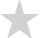
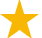

In [150]:
soup

# Traitement 

In [156]:
df.to_excel('toto.xlsx')

In [157]:
df.rename(columns={'Width': 'ts_dimensions_width', 'Height': 'ts_dimensions_height', 'Length': 'ts_dimensions_length'}, inplace=True)

In [202]:
list_columns = [
    

    'weight',
    'color',
    'raw_materials',
    'mgs_brand',
    'no_of_peices',
    'manufacturer',
   
    
    
]

In [203]:
for column in list_columns:
    df.loc[(df[column] == '') | (df[column].isnull()), column] = '__EMPTY__VALUE__'

In [204]:
two_month = datetime.now() + timedelta(days=60)
two_month = two_month.strftime("%m/%d/%Y")
today = datetime.today().strftime("%m/%d/%Y")
df['news_to_date'] = two_month
df['news_from_date'] = today

In [161]:
df['supplier'] = 'AlA'

In [162]:
df['is_in_stock'] = 1

In [163]:
df['allow_backorders'] = df['is_in_stock']
df['estimated_delivery_enable'] = 'Static, Text'

In [186]:
df['small_image'] =  df['base_image']
df['swatch_image'] =  df['base_image']
df['thumbnail_image'] =  df['base_image']
df['attribute_set_code'] = 'Default'
df['product_websites'] = 'base'

In [187]:
df['out_of_stock_qty'] = -5
df['qty'] = 0
df['product_online'] = df['is_in_stock']

# Traitement fonctions

In [171]:
def toto_clean(name):
    df[name] = df[name].str.replace('•', '-')
    df[name] = df[name].str.replace(':', '-')
    df[name] = df[name].str.replace('/', '-')
    df[name] = df[name].str.replace('"', '-')
    df[name] = df[name].str.replace('%', '-')
    df[name] = df[name].str.replace('&', '-')
    df[name] = df[name].str.replace('?', '-', regex=False)
    df[name] = df[name].str.replace('(', '-', regex=False)
    df[name] = df[name].str.replace(')', '-', regex=False)
    df[name] = df[name].str.replace('{', '-', regex=False)
    df[name] = df[name].str.replace('}', '-', regex=False)
    df[name] = df[name].str.replace("'", '-', regex=False)
    df[name] = df[name].str.replace('*', 'X', regex=False)
    df[name] = df[name].str.replace('#', '-')
    df[name] = df[name].str.replace('”', '-')
    df[name] = df[name].str.replace('!', '-')
    df[name] = df[name].str.replace('”', '-')
    df[name] = df[name].str.replace('=', '-')
    df[name] = df[name].str.replace('+', '-', regex=False)
    df[name] = df[name].str.replace('،', '-', regex=False)
    df[name] = df[name].str.replace('عرض أقل', '', regex=False)
    df[name] = df[name].str.replace('،', '-', regex=False)
    
        
    
def ampty_value(name):
    df.loc[df[name].isnull(), name] = '__EMPTY__VALUE__'
    
    
def price_num(name):
    try:
        df[name] = df[name].str.replace('-', '')
        df[name] = df[name].str.replace(',', '')
    except:
        pass
    df.loc[df[name] == '__EMPTY__VALUE__', name] = 0
    
    df[name] = pd.to_numeric(df[name])
    df.loc[df[name] == 0, name] = '__EMPTY__VALUE__'

In [172]:
def clean_punct(name):
    for c in string.punctuation:
        df[name] = df[name].str.replace(c, '-', regex=False)

In [168]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [173]:
toto_clean('name')

In [174]:
toto_clean('description')

In [175]:
toto_clean('name')

In [176]:
df.to_excel('ala.xlsx')

In [177]:
 df['sku'] = 'SAF-' +  df['sku']

In [178]:
df['url_key'] = df['sku'] + '-' + df['name']

In [179]:
df['estimated_delivery_text'] = 'الوقت المقدر لشحن هذا المنتج أسبوعين'

In [180]:
df['estimated_delivery_enable'] = 'Static Text'

In [181]:
df['categories'] = ''

In [182]:
df['price'] = df['price'].str.replace(',', '')

In [183]:
df['special_price'] = df['special_price'].str.replace(',', '')

KeyError: 'special_price'

In [184]:
df['price'] = pd.to_numeric(df['price'])

In [182]:
df['special_price'] = pd.to_numeric(df['special_price'])

# Categories add

In [206]:
df.columns

Index(['sku number only', 'sku', 'store_view_code', 'attribute_set_code',
       'product_websites', 'name', 'description', 'short_description',
       'link_url', 'cat1', 'cat2', 'cat3', 'categories', 'free_colors',
       'ts_dimensions_width', 'ts_dimensions_height', 'ts_dimensions_length',
       'brand', 'url_key', 'cost', 'price', 'special_price', 'visibility',
       'product_type', 'tax_class_name', 'news_from_date', 'news_to_date',
       'base_image', 'small_image', 'swatch_image', 'thumbnail_image',
       'additionnel_images', 'product_online', 'type_', 'control_type',
       'barcode', 'cooling_capacity', 'voltage', 'hertz',
       'energy_efficiency_class', 'energy_efficiency_rate', 'weight_kilo',
       'indoor_lamp', 'guarantee', 'compressor_warranty', 'compressor_type',
       'manufacturer', 'air_direction', 'qty', 'out_of_stock_qty',
       'allow_backorders', 'is_in_stock', 'estimated_delivery_enable',
       'estimated_delivery_text', 'supplier'],
      dtype='obje

In [204]:
cats = pd.read_excel('/home/wafistos/Documents/Projects/scaping_wafi/alassly/categories/categories.xlsx')

In [205]:
list_cats = []
for index, row in cats.iterrows():
    list_cats.append([ row['cat2'], row['ID categories'], ])

In [222]:
list_cats

[['ثلاجة بابين', '43870,43876,43877,113'],
 ['ثلاجة تبريد باب واحد', '43870,43876,43877,113'],
 ['شاشات', '43870,43871,43872,113'],
 ['فريزرات عمودي', '43870,43876,43878,113'],
 ['سبليت', '43870,43901,43902,113'],
 ['نشافات', '43870,43876,43880,113'],
 ['مبردات المياه', '43870,43876,43879'],
 ['شباك', '43870,43901,43902,113'],
 ['غسالات صحون', '43870,43876,43881,113'],
 ['غسالات تعبئة أمامية', '43870,43876,43880,113'],
 ['غسالات تحميل علوي', '43870,43876,43880,113'],
 ['غسالات حوضين', '43870,43876,43880,113'],
 ['افران كهربائية', '43870,42725,43885,113'],
 ['فريزرات أرضي', '43870,43876,43878,113'],
 ['كاويات', '43870,43876,43883,113'],
 ['مكانس كهربائية', '43870,43876,43882'],
 ['دولابي', '43870,43901,43902,113'],
 ['كاسيت', '43870,43901,43902,113'],
 ['مخفية', '43870,43901,43902,113'],
 ['مايكرويف وأفران', '43870,42725,43886,113']]

In [225]:
for tt in list_cats:
    df.loc[df['cat1']== tt[0], 'categories'] = tt[1]

In [226]:
for tt in list_cats:
    df.loc[df['cat2']== tt[0], 'categories'] = tt[1]

0     43870,43876,43877,113
1     43870,43876,43877,113
2     43870,43876,43877,113
3     43870,43876,43877,113
4     43870,43876,43877,113
              ...          
91    43870,43901,43902,113
92    43870,43901,43902,113
93    43870,43901,43902,113
94    43870,43901,43902,113
95    43870,43901,43902,113
Name: categories, Length: 96, dtype: object

# Collections add 

In [109]:
cols = pd.read_excel('/home/wafistos/Documents/Projects/scaping_wafi/scrapingalrugaibfurniture/sub_categories/categories/Rugaib brands.xlsx')

In [110]:
list_cols = []
for index, row in cols.iterrows():
    list_cols.append([ row['collection'], row['mgs_brand']])

In [111]:
for col in list_cols:
    df.loc[df['collection'] == col[0], 'mgs_brand'] = col[1]

In [188]:
df['cost'] = df['price']

In [189]:
df['store_view_code'] = ''

In [190]:
df.loc[df['special_price'] == 0 , 'special_price'] = '__EMPTY__VALUE__'

KeyError: 'special_price'

In [197]:
df['sku number only'] = df['sku'].str.replace('SAF-', '')

In [198]:
df['product_type'] = 'simple'

In [193]:
df['cost'] = df['price']

In [121]:
df['price'] = df['price'] * 1.25
df['special_price'] = df['special_price'] * 1.25

In [194]:
df['supplier'] = 'SAF'

In [195]:
df['news_from_date'] = df['today']

KeyError: 'today'

In [196]:
df['news_to_date'] = df['two_month']

KeyError: 'two_month'

In [190]:
df['visibility'] = 'Catalog, Search'

In [191]:
df['tax_class_name']= 'Taxable Goods'

In [228]:
df = df[[ 'sku number only',
        'sku', 
         'store_view_code',
         'attribute_set_code',
         'product_websites',
         'name',   
         'description', 
         'short_description', 
         'link_url', 
         'cat1', 
         'cat2', 
         'cat3', 
         'categories', 
         'free_colors', 
         'ts_dimensions_width', 
         'ts_dimensions_height', 
         'ts_dimensions_length',
         'brand',
         'url_key',
         'cost',  
         'price', 
         'special_price', 
         'visibility',
         'product_type',
         'tax_class_name', 
         'news_from_date', 
         'news_to_date', 
         'base_image', 
         'small_image', 
         'swatch_image' , 
         'thumbnail_image', 
         'additionnel_images', 
         'product_online',
         
         'type_',
        'control_type',
        'barcode',
        'cooling_capacity',
        'voltage',
        'hertz',
        'energy_efficiency_class',
        'energy_efficiency_rate',
        'weight_kilo',
        'indoor_lamp',
        'guarantee',
        'compressor_warranty',
        'compressor_type',
        'manufacturer',
        'air_direction',
         
         
         
         
         
         'qty', 
         'out_of_stock_qty', 
         'allow_backorders', 
         'is_in_stock', 
         'estimated_delivery_enable',
         'estimated_delivery_text',
         'supplier',   
        ]]

In [205]:
df.to_excel('Safaa_test_v2.xlsx', index=False)